In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4668 - accuracy: 0.8671
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1106 - accuracy: 0.9653
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0691 - accuracy: 0.9788


In [6]:
val_loss, val_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1016 - accuracy: 0.9688


In [7]:
model.save('epic_num_reader.model')

INFO:tensorflow:Assets written to: epic_num_reader.model/assets


In [8]:
new_model = tf.keras.models.load_model('epic_num_reader.model')
predictions = new_model.predict([x_test])

In [9]:
import numpy as np

print(np.argmax(predictions[0]))

7


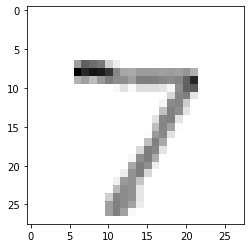

In [10]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()